# Generating the SuperScreen logo

The `SuperScreen` logo is a superconducting "S" screening a uniform applied magnetic field. This notebook generates the logo as follows:

1. Define a `matplotlib` `TextPath` object and use it to extract polygon vertices that draw an "S".
2. Create a `superscreen.Device` to represent the superconducting "S".
3. Solve for the response of the "S" to an applied magnetic field.
4. Visualize the resulting screening currents and fields.

In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
from matplotlib.textpath import TextPath
from matplotlib.font_manager import FontProperties

import superscreen as sc

SAVE = False

Define the `TextPath`:

In [2]:
fontprops = FontProperties(weight="bold", family="sans-serif")
path = TextPath((0, 0), "S", size=10, prop=fontprops)

Sample each of the `TextPath`'s Bezier curves to get polygon vertices:

In [3]:
t = np.linspace(0, 1, 11)
segments = [bezier(t) for bezier, _ in path.iter_bezier()]
points = np.concatenate(segments)

Center the resulting points and remove duplicates:

In [4]:
points -= points.mean(axis=0)
_, ix = np.unique(points, axis=0, return_index=True)
points = points[np.sort(ix)]

Create and plot a `superscreen.Polygon` representing the "S":

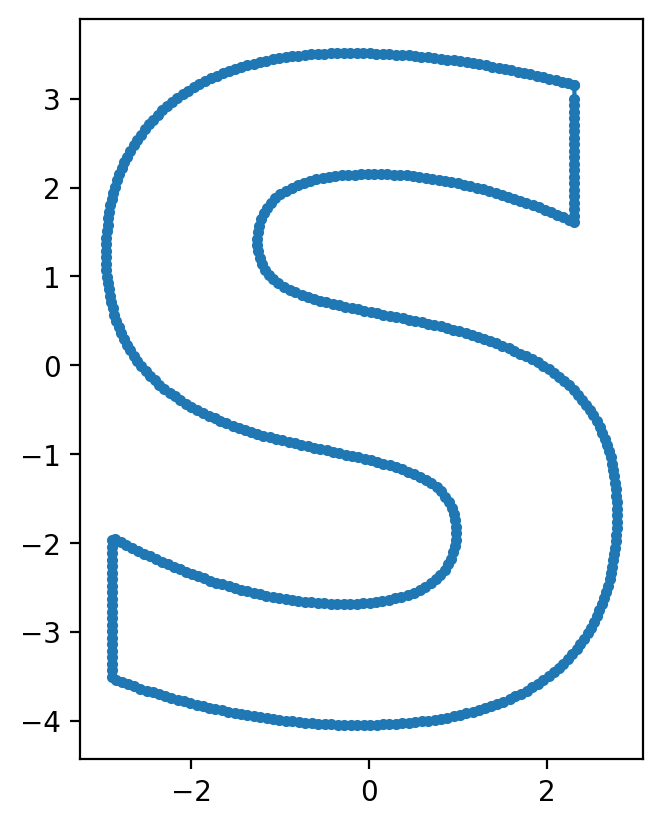

In [5]:
S = sc.Polygon(points=points).resample(501)
ax = S.plot(marker=".")

Create a `Device` containing the `Polygon`:

In [6]:
layers = [
    sc.Layer("base", Lambda=1, z0=0),
]

S.layer = "base"
S.name = "S"
films = [S]

abstract_regions = [
    sc.Polygon(
        "bounding_box",
        layer="base",
        points=sc.geometry.circle(4.75, center=(0, -0.35)),
    ),
]

device = sc.Device(
    "S",
    layers=layers,
    films=films,
    abstract_regions=abstract_regions,
)

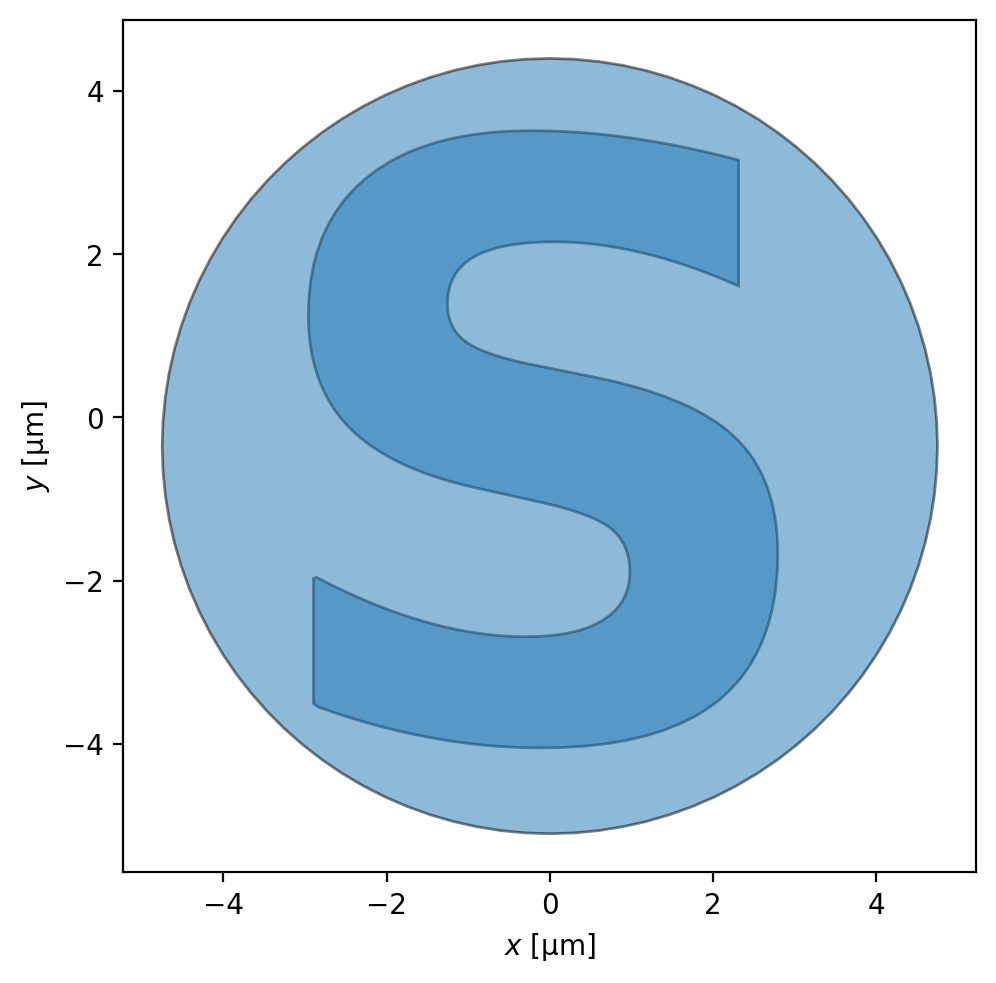

In [7]:
fig, ax = device.draw()

In [8]:
device.make_mesh(min_points=4_000, smooth=100)

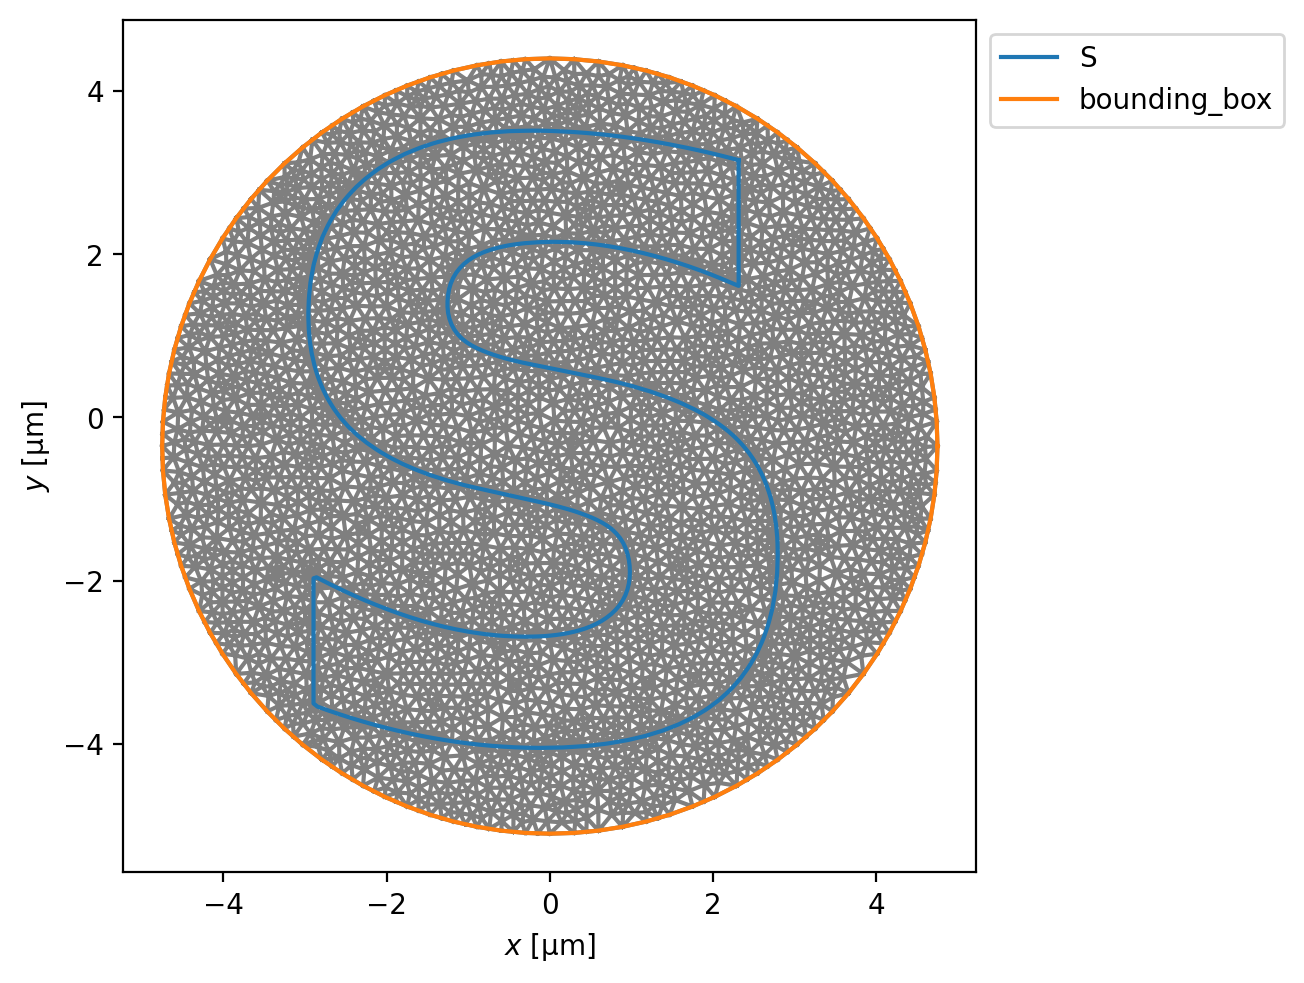

In [9]:
ax = device.plot(mesh=True, mesh_kwargs=dict(color="k", alpha=0.5))

Solve for the `Device`'s response to a constant applied field:

In [10]:
solutions = sc.solve(
    device=device,
    applied_field=sc.sources.ConstantField(1),
    field_units="mT",
)

Plot and save the results:

In [11]:
fig_formats = ["png"]

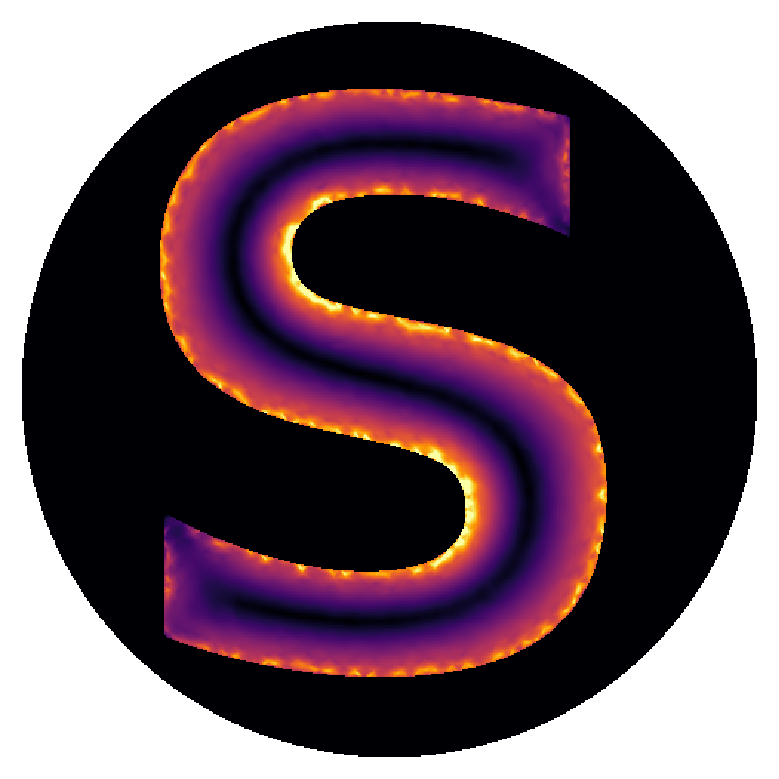

In [12]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500, streamplot=False, vmin=0, vmax=750, colorbar=False
)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_currents.{fmt}", dpi=600, bbox_inches="tight")

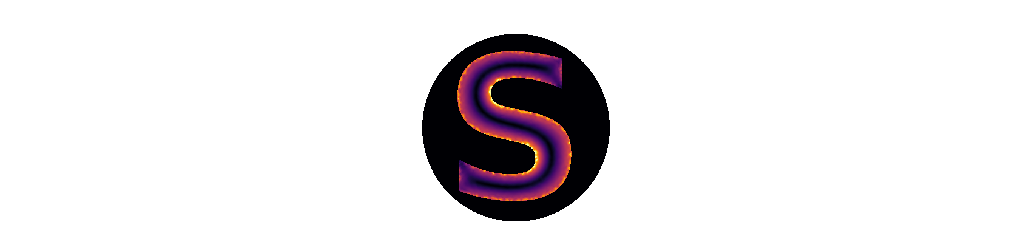

In [13]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500,
    streamplot=False,
    vmin=0,
    vmax=800,
    colorbar=False,
)

for a in axes:
    a.axis("off")
    a.set_title("")
    a.set_xlim(-25, 25)
    a.set_ylim(-5.1, 5.1)

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_currents_small.{fmt}", dpi=600, bbox_inches="tight"
        )

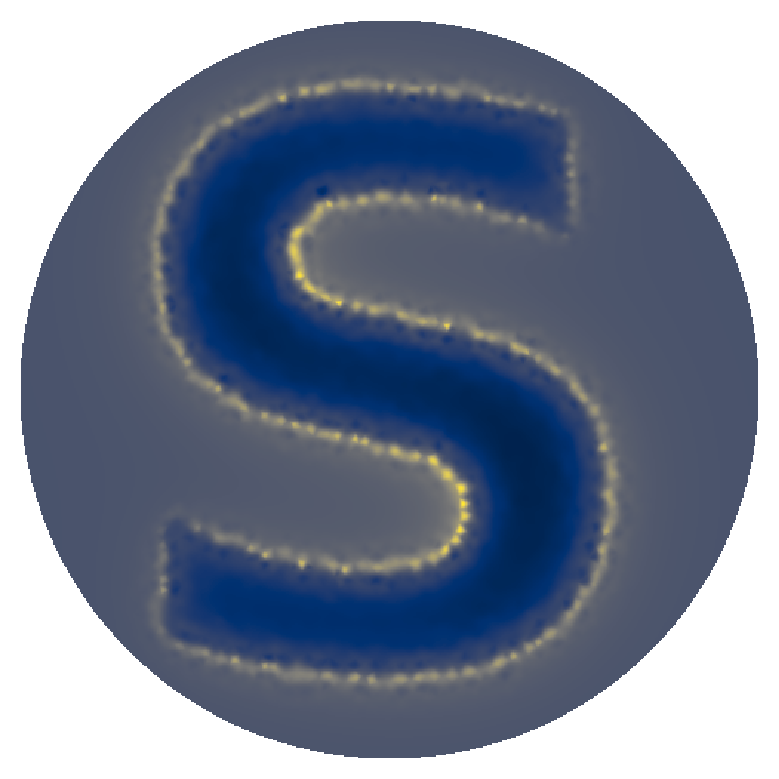

In [14]:
fig, axes = solutions[-1].plot_fields(grid_shape=500, colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_fields.{fmt}", dpi=600, bbox_inches="tight")

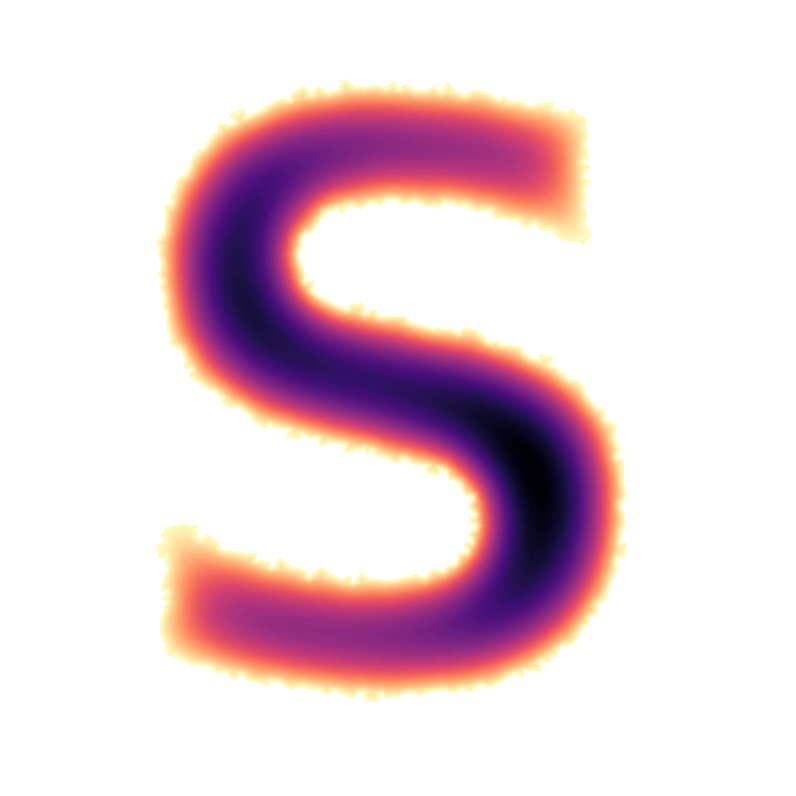

In [15]:
fig, axes = solutions[-1].plot_streams(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_streams.{fmt}", dpi=600, bbox_inches="tight")

In [16]:
device = sc.TransportDevice(
    "S",
    layer=layers[0],
    film=films[0],
    source_terminals=[
        sc.Polygon("source", points=sc.geometry.box(0.1, 2, center=(-2.92, -2.8))),
    ],
    drain_terminal=sc.Polygon(
        "drain", points=sc.geometry.box(0.1, 2, center=(2.32, 2.4))
    ),
)

In [17]:
device.make_mesh(min_points=2_000)

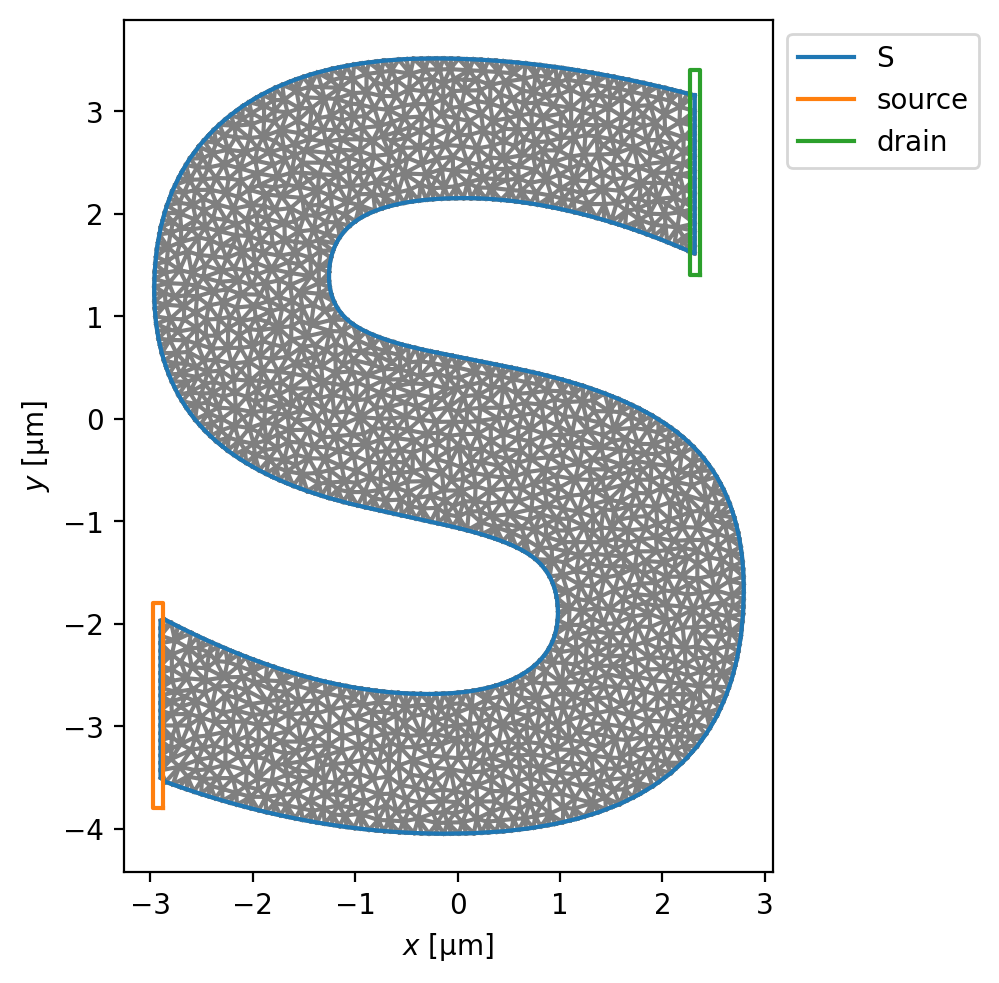

In [18]:
ax = device.plot(mesh=True, mesh_kwargs=dict(color="k", alpha=0.5))

In [19]:
solutions = sc.solve(device, terminal_currents=dict(source="-1 uA"))

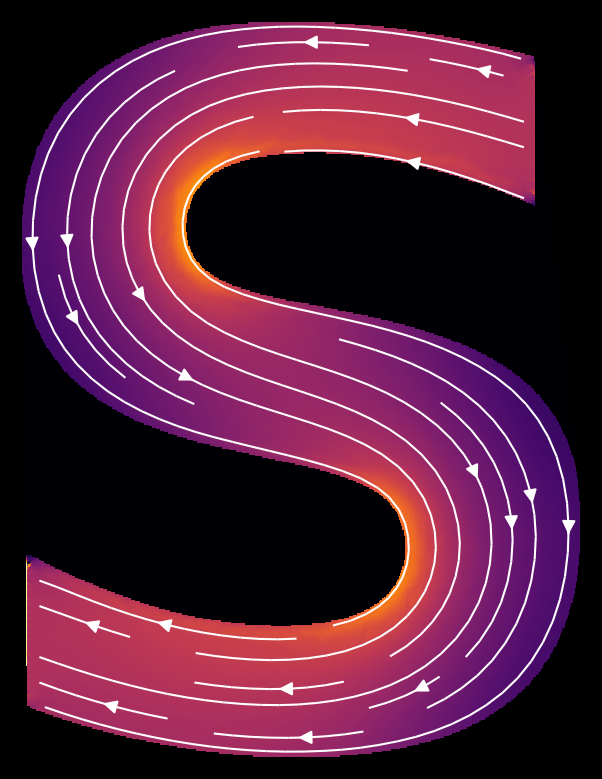

In [20]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500,
    streamplot=True,
    colorbar=False,
    vmin=0,
    vmax=1.5,
)
fig.set_facecolor("k")

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_terminal_currents.{fmt}", dpi=600, bbox_inches="tight"
        )

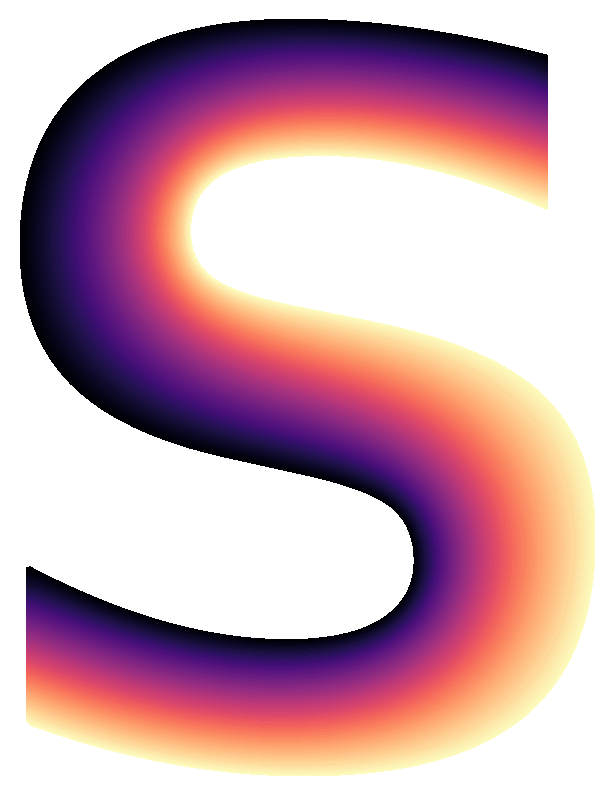

In [21]:
fig, axes = solutions[-1].plot_streams(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")

if SAVE:
    fig.set_facecolor("none")
    for fmt in fig_formats:
        fig.savefig(
            f"../images/logo_terminal_streams.{fmt}", dpi=600, bbox_inches="tight"
        )

In [22]:
sc.version_table()

Software,Version
SuperScreen,0.8.0
Numpy,1.23.3
SciPy,1.9.1
matplotlib,3.6.0
ray,2.0.0
jax,0.3.18
IPython,8.5.0
Python,"3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) [Clang 13.0.1 ]"
OS,posix [darwin]
Number of CPUs,"Physical: 10, Logical: 10"
